# Investigating the Titanic dataset 
A partial record of the passengers on the Titanic gives key insight into certain observations and results, which have been visualized throughout using bar charts, histograms and scatter plots. 

## Questions posed:
I started my questions from simple variables that I believed were correlated, and made my way upto the more serious questions. The questions are:

1. How many people survived?
2. What was the relation (if any) between classes of passenger and their fares?
3. What was the relation (if any) between ages of passengers and the class in which they travelled?
4. What was the distribution of ages of the survivors?
5. What was the distribution of genders of the survivors?
6. What was the distribution of the embarkment ports of the survivors?
7. How did the survival rate of females living in 1st class differ from males living in 3rd class?
8. What was the relation (if any) between the number of spouses/siblings and parents/children?
9. What was the distribution of survival rates between both genders in all classes?

**Note: **A lot of questions above involve looking at the 'Survived' column in the preprocessing stages, so even though they might be analyzing a single variable, there are in fact 2 variables being analyzed because of the 'Survived' column.

Questions 2,3 & 8 do not look at the survivors, but the Titanic population as a whole.

## Data Wrangling
1. I used the read_csv() function of Pandas to store the CSV data in a DataFrame.
2. Throughout the analysis, I mostly used index arrays to get the data regarding the survivors.
3. I also used the *dropna()* function to drop any rows/columns with NaN from my Titanic dataset for a more thorough analysis. 
**NOTE: I do not remove NaN values immediately; instead, for each analysis phase, I drop values which are NaN in the field(s) I am analysing. For example, if I am collecting data on the ages of the survivors, I only disregard those passengers who have a NaN value in their 'Age' field.**

## Data Analysis, Conclusions & Visualization
I have clubbed the 3 parts, because they are done like so in the code below.
I have used Python's inbuilt *numpy* and *Pandas* libraries to read and analyze the CSV containing the data about the Titanic. I also used *matlplotlib* to make all the visualizations you see below. 

Most of the anaylsis done through the code is self-explanatory. I have put comments in the code where I think the code function's is unclear.

All the conclusions are based on my own thinking process.

Any conclusions are mentioned at the end of the section. Through I have used a good approach to the analysis and found a lot of **correlations**, none of my findings can be seen as  **causations**; for that, statistic tests would have to be performed.

## Summary of findings
Presenting all my data above in a few sentences.


In [1]:
# standard imports
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def correlation(x, y):
    '''
    From the Udacity course! :)
    Function to calculate statistical correlation between 2 Pandas Series, x and y.
    Returns a value between -1 and 1, inclusive.
    A result of -1 means they are perfectly negatively correlated ie one series 
    decreases/increases in the same amount as the other series increases/decreases respectively.
    A result of 1 means they are perfectly positively correlated ie one series 
    increases/decreases in the same amount as the other series increases/decreases respectively.
    '''
    
    # standardize variables
    x_mean = x.mean()
    x_std = x.std(ddof=0)
    std_x = (x - x_mean)/x_std
    
    y_mean = y.mean()
    y_std = y.std(ddof=0)
    std_y = (y - y_mean)/y_std
    
    # calculate mathematical result, rounding to 2 decimal places
    return round((std_x * std_y).mean(), 2)

### 1. How many people survived?

In [288]:
# read the csv
titanic = pd.read_csv('titanic-data.csv')

# use an index array to extract people who survived
survived_indexes = (titanic['Survived'] == True)
survived = titanic[survived_indexes]
# print survived['Sex'].value_counts()

# converted to float to prevent rounding down to 0
print "Number of people who survived: ", len(survived)
print "Percentage of people who survived:", round(len(survived)/float(len(titanic)), 4) * 100, "%"

female    233
male      109
Name: Sex, dtype: int64
Number of people who survived:  342
Percentage of people who survived: 38.38 %


Note that the variables above will be used throughout the analysis below for other purposes.

### 2. Relation between passenger class and fare

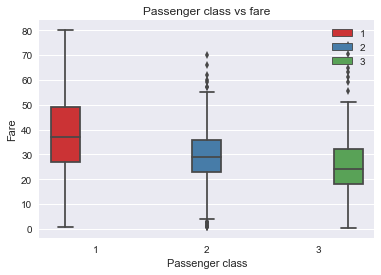

In [302]:
sns.boxplot(data=titanic_smaller, x='Pclass', y='Age', hue = 'Pclass', palette = 'Set1' );
# plt.scatter(titanic['Pclass'].values, titanic['Fare'].values, s = 3)
plt.xlabel("Passenger class")
plt.ylabel("Fare")
plt.title("Passenger class vs fare")
plt.legend(loc = 'upper right')

It is clear from the graph that the '1' label on the x-axis has a higher set of y-values (*fares*) than both '2' and '3'.

Below, I found the mean for each class and the correlation (moderately negative) between the class and fare. Both are in agreement with my findings.

In [298]:
print titanic.groupby('Pclass')['Fare'].mean()

Pclass
1    84.154687
2    20.662183
3    13.675550
Name: Fare, dtype: float64


In [6]:
print "Correlation is: ", correlation(titanic['Pclass'].values, titanic['Fare'].values)

Correlation is:  -0.55


The data analysis below confirms that, *on average*, a higher class (lower class number ie 1st class is higher than 2nd class) is associated with a higher fare.

### 3. What was the relation (if any) between ages of passengers and the class in which they travelled? 

Correlation is: -0.37


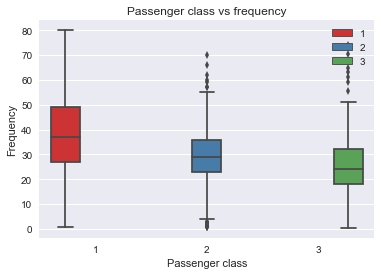

In [7]:
# removing all NaN values
age_pclass = titanic[['Age','Pclass']].dropna()
age_values = age_pclass['Age'].values
pclass_values = age_pclass['Pclass'].values

print "Correlation is:", correlation(age_values, pclass_values)
sns.boxplot(data=titanic, x='Pclass', y='Age', hue = 'Pclass', palette = 'Set1');
plt.xlabel("Passenger class")
plt.ylabel("Frequency")
plt.title("Passenger class vs frequency")
plt.legend(loc = 'upper right')

This finding is definitely what I was looking for!

The above data analysis confirms my belief that, in fact, there was a negative relation, with the mean age in the 1st class being 13 years higher than that for the 3rd class! 

I calculated the means below to double check!

**(The mean for each class is shown by the dark line in the middle of the box.)**

In [292]:
mean_age_per_class = age_pclass.groupby('Pclass').mean()
print mean_age_per_class

              Age
Pclass           
1       38.233441
2       29.877630
3       25.140620


It is visible from the graph that the data points for the 1st class are slightly higher (as a whole) than those of the 2nd class, which are again higher than those of the 3rd.

This confirms the hypothesis I had: *on average*, older people travel in 1st class than in 3rd class. 

This is probably because people usually would have worked when younger and saved up money to go on this expensive cruise (<a href = "https://en.wikipedia.org/wiki/Passengers_of_the_RMS_Titanic">the average ticket price for an adult second class passenger was £13, the equivalent of £1,123 today</a>). 


###  4. What was the distribution of ages of the survivors?


count    290.000000
mean      28.343690
std       14.950952
min        0.420000
25%       19.000000
50%       28.000000
75%       36.000000
max       80.000000
Name: Age, dtype: float64

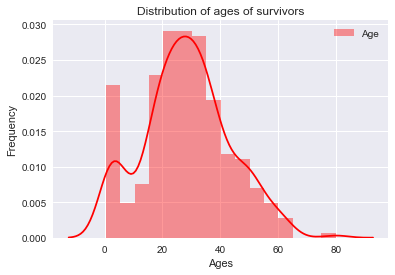

In [9]:
# getting frequency counts of survivors' ages
survived_ages = survived['Age'].dropna()
sns.distplot(survived_ages, color = "red", label = 'Age')
# plt.bar(survived_ages_freq.index.values, survived_ages_freq.values, color = "red", label = 'Age')
plt.xlabel("Ages")
plt.ylabel("Frequency")
plt.title("Distribution of ages of survivors")
plt.legend(loc = 'upper right')

survived_ages.describe()

It is evident from the bar graph and the statistics above it that most of the ages are clustured around around 28 years of age.

In fact, almost 50% of the ages are between 19 and 36, suggesting that it was **mostly younger passengers who survived**.

It is interesting to see that between the ages of almost 63 and 80, there are no data points, strengthening our claim above!

### 5. What was the distribution of genders of the survivors?
The data analysis below confirms that more female passengers survived than male passengers, with a ratio of almost 2:1

Hoping to find an *inverse relation* with the below graph, I found to my display that the columns in the bar chart look almost identical for all 3 classes. 

female    197
male       93
Name: Sex, dtype: int64


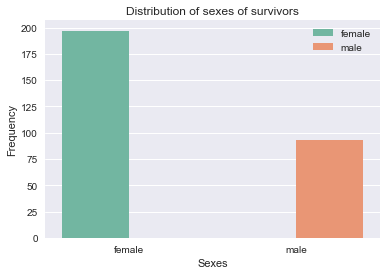

In [290]:
survived_genders = survived[pd.notnull(survived['Age'])]
print survived_genders['Sex'].value_counts()
sns.countplot(data = survived_genders, x = 'Sex', hue = 'Sex', palette = 'Set2')
plt.xlabel("Sexes")
plt.ylabel("Frequency")
plt.title("Distribution of sexes of survivors")
plt.legend(loc = 'upper right')

In [291]:
print "Percentage of females: ", round(survived_genders['Sex'].value_counts()['female']/float(survived_genders['Sex'].value_counts().sum()), 4) * 100, "%"

Percentage of females:  67.93 %


### 6. What was the distribution of the embarkment ports of the survivors?

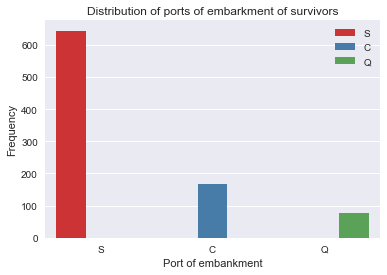

In [128]:
embarked = titanic[pd.notnull(titanic['Embarked'])]
sns.countplot(data = embarked, x = 'Embarked', hue = 'Embarked', palette = 'Set1')
plt.xlabel("Port of embankment")
plt.ylabel("Frequency")
plt.title("Distribution of ports of embarkment of survivors")
plt.legend(loc = 'upper right')

In [129]:
S_embarked = embarked.groupby('Embarked').get_group('S')
print "Percentage from S: ", round(len(S_embarked)/float(len(embarked)) * 100, 2), "%" 

Percentage from S:  72.44 %


It appears from the above graph that an overwhelmingly large number of survivors came from Southampton (S)

### 7. How did the survival rate of females living in 1st class differ from males living in 3rd class?

In [14]:
titanic.groupby(['Pclass', 'Sex']).size()
first_female = titanic.groupby(['Pclass', 'Sex']).get_group((1, 'female'))
first_female_num = round(first_female['Survived'].dropna().mean() * 100, 2)
print "Percentage of females living in the first class who survived:", first_female_num, "%"

third_male = titanic.groupby(['Pclass', 'Sex']).get_group((3, 'male'))
third_male_num = round(third_male['Survived'].dropna().mean() * 100, 2)
print "Percentage of males living in the third class who survived:", third_male_num, "%"

print "Difference in survival rates =", round(first_female_num/third_male_num, 2)

Percentage of females living in the first class who survived: 96.81 %
Percentage of males living in the third class who survived: 13.54 %
Difference in survival rates = 7.15



### 8. What was the relation (if any) between the number of spouses/siblings and parents/children?

Correlation coefficient is:  0.41


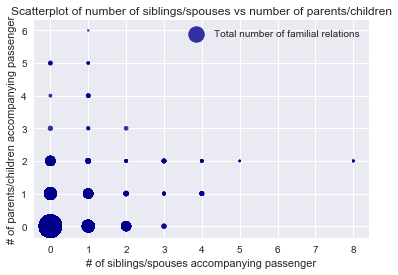

In [15]:
# making m`arker size euivalent to value counts

# titanic_mod contains the OVERALL number of familial relations for each passenger
titanic_mod = titanic['SibSp'] + titanic['Parch']
marker_size = titanic_mod.value_counts().loc[titanic_mod]

print "Correlation coefficient is: ", correlation(titanic['SibSp'], titanic['Parch'])

# plt.scatter(titanic['SibSp'], titanic['Parch'], s = marker_size, color = "darkblue")
sns.regplot(x=titanic['SibSp'], y=titanic['Parch'], fit_reg=False, scatter_kws={"s": marker_size}, color = "darkblue", label = 'Total number of familial relations')
plt.xlabel("# of siblings/spouses accompanying passenger")
plt.ylabel("# of parents/children accompanying passenger")
plt.title("Scatterplot of number of siblings/spouses vs number of parents/children")
plt.legend(loc = 'upper right')

While the correlation coefficient isn't as large as I hoped for, I did notice the **large** circle at (0, 0) and decided to investigate further. 

Any data point (passenger) at (0, 0) implies that that passenger had 0 familial relations with him/her.

In [16]:
print "Number of passengers with 0 familial relations: ", titanic_mod.value_counts().loc[0]
print "Percentage of such passengers: ", round(titanic_mod.value_counts().loc[0]/float(titanic_mod.value_counts().sum()) * 100, 2), "%"

Number of passengers with 0 familial relations:  537
Percentage of such passengers:  60.27 %


There are 537 passengers with no familial relations, making up a whopping 60% of the passengers on the Titanic!

Assuming that having no accompanying passengers implies that the passenger is single makes it same to presume that quite a lot of people on the Titanic were, in fact, unmarried.

### 9. What was the distribution of survival rates between both genders in all classes?

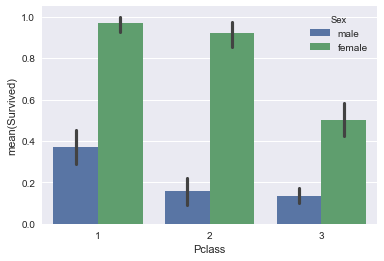

In [245]:
not_null_survival = titanic[pd.notnull(titanic['Survived'])]
sns.barplot(x="Pclass", y="Survived", hue = "Sex", data=not_null_survival)

As can be seen below, females survived with higher probability than did men for all 3 classes by whopping margins! 

Also, it seems that the higher the class, the more the survivors from that class, from an overall of 63% for the 1st class to 24% for the 3rd class! This too is supported by the numbers below!

The numerical evidence:

In [246]:
grouped = not_null_survival.groupby(['Sex', 'Pclass'])
grouped_survived = survived.groupby(['Sex', 'Pclass'])

# for loop to generalize overall likelihood of survival
for i in range(len(grouped)/2):
    print "Probability of survival in passenger class", i + 1, "of sex:"
    survivor = 0
    total = 0
    for j in ['female', 'male']:
        percent =  round (len(grouped_survived.get_group((j, i + 1)))/float(len(grouped.get_group((j, i + 1)))) * 100, 2)
        print  j, ": ", percent, "%"
        survivor += len(grouped_survived.get_group((j, i + 1)))
        total += len(grouped.get_group((j, i + 1)))
    print "overall:", round(survivor/float(total) * 100, 2), "%"

Probability of survival in passenger class 1 of sex:
female :  96.81 %
male :  36.89 %
overall: 62.96 %
Probability of survival in passenger class 2 of sex:
female :  92.11 %
male :  15.74 %
overall: 47.28 %
Probability of survival in passenger class 3 of sex:
female :  50.0 %
male :  13.54 %
overall: 24.24 %


### Summary of findings
Through the above, I have analyzed several single variable & multi variable facets of the Titanic data. In some places, my hunch was right. In others, I didn't find what I was looking for, but in the bargain, found a totally different interesting fact! Graphs were very helpful in seeing anomalies and trends in the data.

These were my findings:
1. Only about 38% of the Titanic population survived.
2. Passengers in higher classes were, on average, older.
3. Higher classes cost more, on average.
4. About 60% of the Titanic population were single.
5. About 68% of the survivors were female.
6. About 68% of survivors were between the ages of 19 and 36.
7. Females living in 1st class had a 7.15 times greater chance of survival than males living in 3rd class.
8. About 72% of survivors boarded from Southampton.
9. Females survived with higher probability. (This agrees with 5.) 
10. The higher the passenger class, the more the survivors from that class.

**NOTE:** my findings are based on the partial data given to me, so it may not agree with the actual data.

## External Sources
1. <a href = "https://www.kaggle.com/c/titanic/data"> Titanic dataset </a>
2. <a href = "https://en.wikipedia.org/wiki/Passengers_of_the_RMS_Titanic"> Titanic Wikipedia </a>
